# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/visualization`
### Do One.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [1]:
# Q1:
# setting up environment
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("./data/college_completion.csv")

# Q2 - previewing data:
print(df.shape) # there are 3798 observations/rows, and 63 variables/columns
print(df.columns) # the variables present:
df.head(5)

(3798, 63)
Index(['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control',
       'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count',
       'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value',
       'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value',
       'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile',
       'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile',
       'endow_value', 'endow_percentile', 'grad_100_value',
       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
       'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile',
       'ft_fac_value', 'ft_fac_percentile', 'vsa_year',
       'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first',
       'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first',
       'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first',
       'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [2]:
# Q3 - cross tabulating columns control and level:
cross_table = pd.crosstab(df['control'], df['level'])
print(cross_table)

# looking at additional stats within cross table:
print(cross_table['4-year'].sum())

# means for each column:
cross_table.mean()

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632
2339


level
2-year    486.333333
4-year    779.666667
dtype: float64

The largest proportion of respondents attended a 4-year private not-for-profit institution, while the lowest proportion attended 2-year private not-for-profit institution. Overall

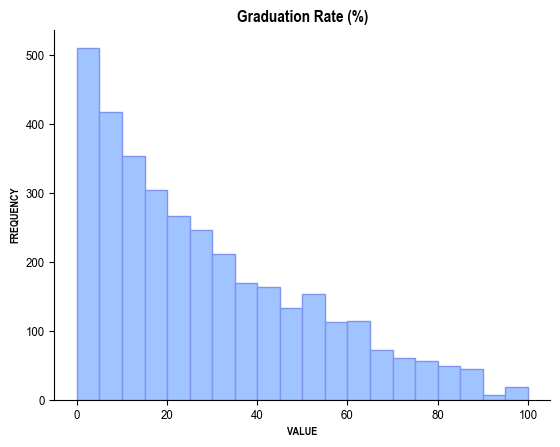

In [3]:
# Q4: Create a histogram, kernel density plot, boxplot, and statistical description.
import matplotlib
import matplotlib.pyplot as plt
# setting fonts for the figures:
matplotlib.rcParams["font.family"] = "Arial Narrow"

# histogram plot:
grad_100_value_hist = plt.hist(df['grad_100_value'], bins = 20, color='#a0c4ff', edgecolor='#8093f1')

# extra scaffolding: 
plt.xlabel(xlabel = 'VALUE',fontsize = 8, weight = 'bold')
plt.ylabel(ylabel='FREQUENCY', fontsize = 8, weight = 'bold')
plt.title('Graduation Rate (%)', weight = 'bold')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()


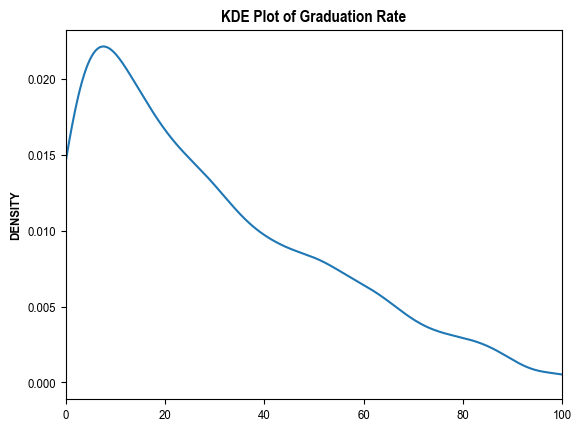

In [4]:
# density kernel plot: grad_100_value
df['grad_100_value'].plot.density().set(xlim=(0, 100))
plt.title("KDE Plot of Graduation Rate", weight = 'bold')
plt.ylabel("DENSITY", weight = 'bold')

plt.show()

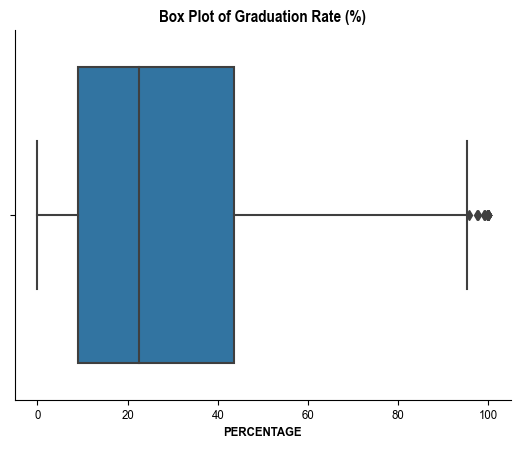

In [5]:
# boxplot:
sns.boxplot(x = df['grad_100_value'])

# extra scaffolding: 
plt.title('Box Plot of Graduation Rate (%)', weight = 'bold')
plt.xlabel("PERCENTAGE", weight = 'bold')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [6]:
# statistical description of grad_100_value
df['grad_100_value'].describe()

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64

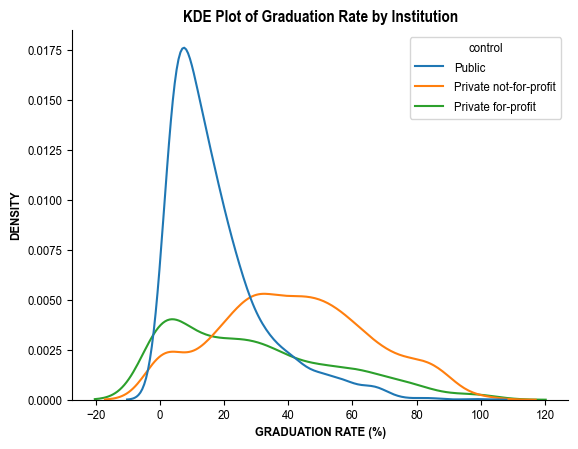

In [7]:
# Q5: create a grouped kernel density plot by 'control' and by 'level'.
df_grad = df.dropna(subset=['grad_100_value'])
sns.kdeplot(data=df_grad, x='grad_100_value', hue='control')

plt.title("KDE Plot of Graduation Rate by Institution", weight = 'bold')
plt.xlabel("GRADUATION RATE (%)", weight = 'bold')
plt.ylabel("DENSITY", weight = 'bold')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()


In [8]:
# stat summaries for grouped vars:
df_grad.groupby(['level', 'control'])['grad_100_value'].describe()

count       mean        std  min     25%  \
level  control                                                             
2-year Private for-profit       461.0  37.197614  25.497380  0.0  15.800   
       Private not-for-profit    68.0  41.913235  28.348302  0.0  16.225   
       Public                   926.0  12.400000  10.893600  0.0   5.100   
4-year Private for-profit       318.0  17.382704  20.788525  0.0   0.000   
       Private not-for-profit  1121.0  41.645674  23.243453  0.0  25.000   
       Public                   573.0  25.561082  16.403902  0.0  13.600   

                                50%     75%    max  
level  control                                      
2-year Private for-profit      33.9  57.800  100.0  
       Private not-for-profit  44.4  61.200  100.0  
       Public                   9.4  16.175   97.8  
4-year Private for-profit      12.5  26.325  100.0  
       Private not-for-profit  41.0  57.800  100.0  
       Public                  21.8  33.800   86.3

The highest graduation rates seem to be from both 2 and 4 year private not-for-profit institutions. They both have the highest mean of about 41% each, while both public 2 and 4 year institutions are significantly lower at around 12% and 25%, respectively.

/var/folders/f0/rhgwtvsd01lfbqlqp_ts85wh0000gn/T/ipykernel_11726/2417804199.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grad['levelXcontrol']=df_grad['level']+', '+df_grad['control']
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


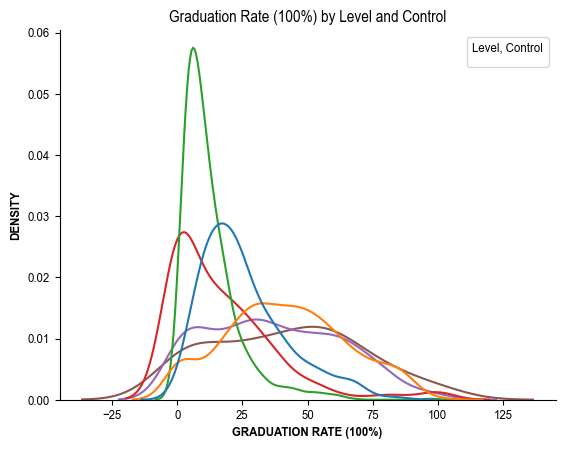

In [13]:
# Q6: create a new variable:
df_grad['levelXcontrol']=df_grad['level']+', '+df_grad['control']

# plotting kernel density for grouped vars:
sns.kdeplot(data=df_grad, x='grad_100_value', hue='levelXcontrol', common_norm=False)

# graph scaffolding:
plt.title('Graduation Rate (100%) by Level and Control')
plt.xlabel('GRADUATION RATE (100%)', weight = 'bold')
plt.ylabel('DENSITY', weight = 'bold')
plt.legend(title="Level, Control")

# removing spines for a cleaner look:
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()


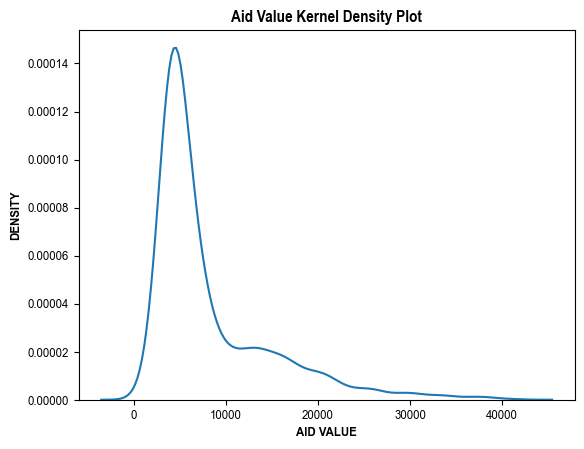

In [20]:
# Q7: Make a kernel density plot of aid_value:

# dropping NaN values so that we can plot data:
df_aid = df.dropna(subset=['aid_value', 'grad_100_value'])

sns.kdeplot(data = df_aid, x = 'aid_value')

# scaffolding: 
plt.title("Aid Value Kernel Density Plot", weight = 'bold')
plt.xlabel("AID VALUE", weight = 'bold')
plt.ylabel('DENSITY', weight = 'bold')

plt.show()

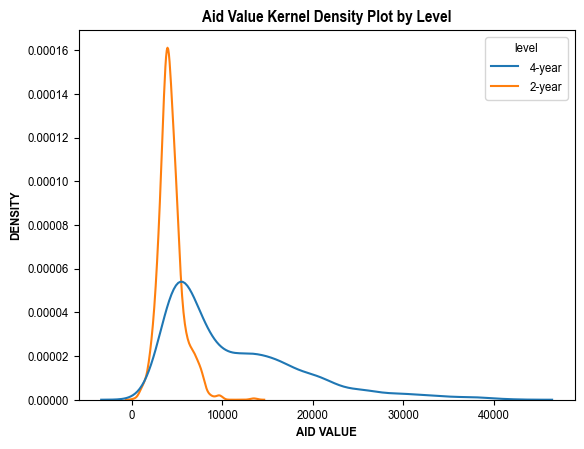

In [26]:
# kernel density plot of aid_value grouped by 'level' (4-year vs 2-year)
sns.kdeplot(data = df_aid, x = 'aid_value', hue = 'level')
# scaffolding: 
plt.title("Aid Value Kernel Density Plot by Level", weight = 'bold')
plt.xlabel("AID VALUE", weight = 'bold')
plt.ylabel('DENSITY', weight = 'bold')

plt.show()

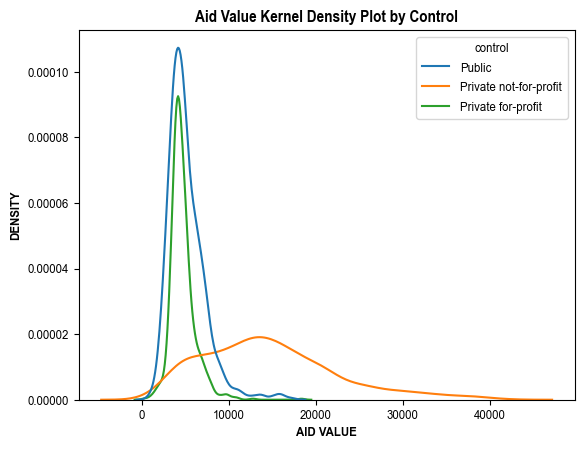

In [27]:
# kernel density plot of aid_value grouped by 'control' (type of institution)
sns.kdeplot(data = df_aid, x = 'aid_value', hue = 'control')

# scaffolding: 
plt.title("Aid Value Kernel Density Plot by Control", weight = 'bold')
plt.xlabel("AID VALUE", weight = 'bold')
plt.ylabel('DENSITY', weight = 'bold')

plt.show()

In [29]:
# stat summaries for aid_value by both 'control' and 'level'
df_aid.groupby(['level', 'control'])['aid_value'].describe()

count          mean          std     min  \
level  control                                                             
2-year Private for-profit       460.0   4548.886957  1273.908071   294.0   
       Private not-for-profit    68.0   5128.058824  2590.449946   934.0   
       Public                   926.0   4126.199784  1260.271382   881.0   
4-year Private for-profit       318.0   4829.050314  1620.406400  2217.0   
       Private not-for-profit  1121.0  15111.199822  7549.163907  1450.0   
       Public                   573.0   6717.588133  2345.658634  2685.0   

                                   25%      50%       75%      max  
level  control                                                      
2-year Private for-profit      3814.75   4286.5   5104.25   9727.0  
       Private not-for-profit  3650.00   4516.5   6311.50  13654.0  
       Public                  3311.25   3943.5   4762.00   9809.0  
4-year Private for-profit      3908.00   4491.5   5236.00  18355.0  
       Private not-for-profit  9913.00  14079.0  19284.00  41580.0  
       Public                  5176.00   6181.0   7507.00  17299.0

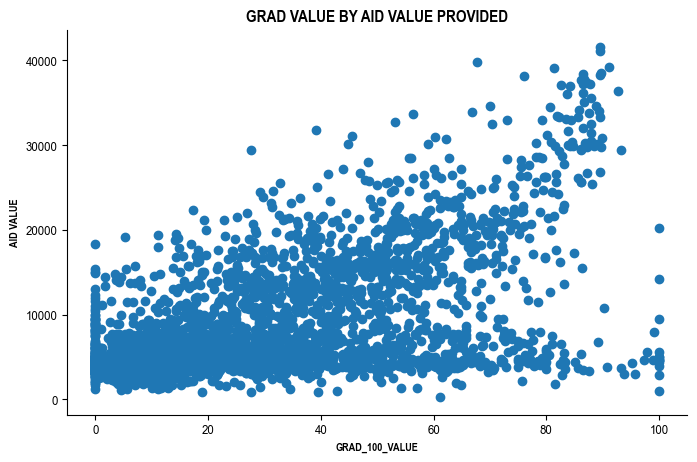

In [ ]:
# Q8: scatterplot

# initial plot
plt.figure(figsize=(8,5))
plt.scatter(df['grad_100_value'], df['aid_value'])


# extra scaffolding: 
plt.xlabel("GRAD_100_VALUE", weight = 'bold', fontsize = 8)
plt.ylabel("AID VALUE", weight = 'bold', fontsize = 8)
plt.title('GRAD VALUE BY AID VALUE PROVIDED', weight = 'bold', fontsize = 12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()


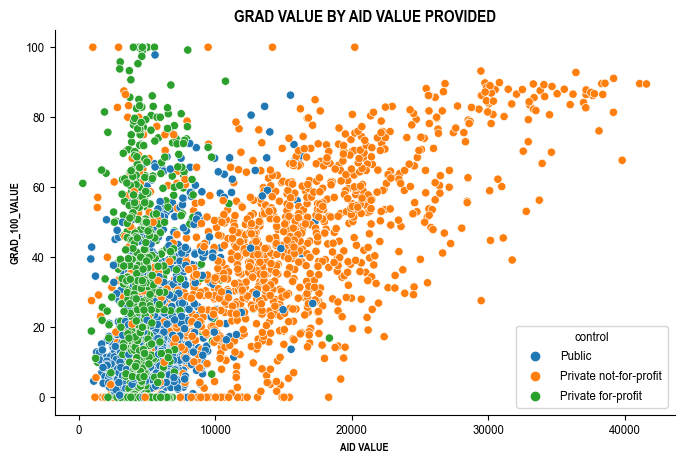

In [35]:
# Q8: scatterplot but grouped vars:

# initial plot - grouped by CONTROL
plt.figure(figsize=(8,5))

sns.scatterplot(data=df_aid, x = 'aid_value', y = 'grad_100_value', hue='control')
# extra scaffolding: 
plt.ylabel("GRAD_100_VALUE", weight = 'bold', fontsize = 8)
plt.xlabel("AID VALUE", weight = 'bold', fontsize = 8)
plt.title('GRAD VALUE BY AID VALUE PROVIDED', weight = 'bold', fontsize = 12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

Private not-for-profit institutions often reward the greatest amount of financial aid and in return tend to see a pretty dispersed distribution of graduation rates. Private for-profit seems to provide the least amount of financial aid, yet they still seem to garner a higher proportion of graduates compared to public institutions.

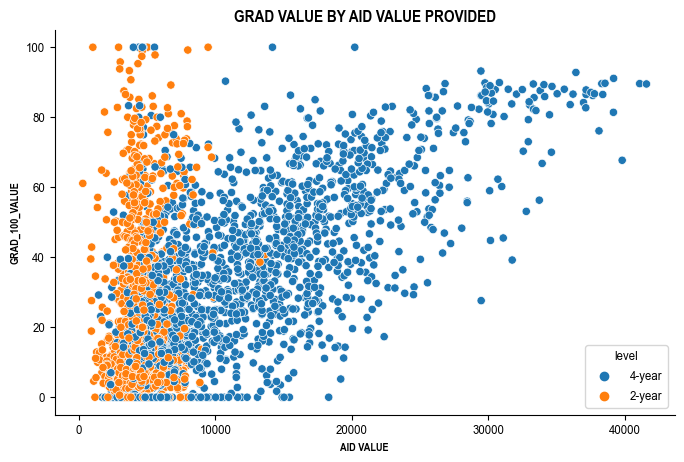

In [36]:
# Q8: scatterplot but grouped vars: grouped by LEVEL
# initial plot
plt.figure(figsize=(8,5))

sns.scatterplot(data=df_aid, x = 'aid_value', y = 'grad_100_value', hue='level')
# extra scaffolding: 
plt.ylabel("GRAD_100_VALUE", weight = 'bold', fontsize = 8)
plt.xlabel("AID VALUE", weight = 'bold', fontsize = 8)
plt.title('GRAD VALUE BY AID VALUE PROVIDED', weight = 'bold', fontsize = 12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

In [38]:
# stat summaries by groups:
aid_grouped_stats = df_aid.groupby(['level', 'control'])['aid_value'].describe()
aid_grouped_stats

count          mean          std     min  \
level  control                                                             
2-year Private for-profit       460.0   4548.886957  1273.908071   294.0   
       Private not-for-profit    68.0   5128.058824  2590.449946   934.0   
       Public                   926.0   4126.199784  1260.271382   881.0   
4-year Private for-profit       318.0   4829.050314  1620.406400  2217.0   
       Private not-for-profit  1121.0  15111.199822  7549.163907  1450.0   
       Public                   573.0   6717.588133  2345.658634  2685.0   

                                   25%      50%       75%      max  
level  control                                                      
2-year Private for-profit      3814.75   4286.5   5104.25   9727.0  
       Private not-for-profit  3650.00   4516.5   6311.50  13654.0  
       Public                  3311.25   3943.5   4762.00   9809.0  
4-year Private for-profit      3908.00   4491.5   5236.00  18355.0  
       Private not-for-profit  9913.00  14079.0  19284.00  41580.0  
       Public                  5176.00   6181.0   7507.00  17299.0

Based on the visualizations, it seems that 4-year institutions tend to provide the more funding compared ot their 2-year counterpart.

**Q2.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them? 
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

**Q3.** This is a case study about understanding and visualizing risk over time, involving a dataset with information about breast cancer mortality rates over time, conditional on different treatments.

1. Load the `./data/Breast Cancer METABRIC.csv` dataset. It has a bunch of interesting variables, but the mains of interest for this question are `Overall Survival (Months)`, which is  and `Overall Survival Survival Status`, which records whether the patient is Alive or Deceased.
2. Make one kernel density plot of `Overall Survival (Months)`, and a second conditional on `Overall Survival Status`. Interpret these plots. What patterns do you see? 

3. The **hazard rate** gives the instantaneous risk of an event occurring, given that it hasn't already happened. It is defined as
$$
h(t) = \dfrac{f(t)}{1-F(t)}
$$
where $F(t)$ is the distribution of arrival times and $f(t)=F'(t)$ is the density of arrival times. Roughly, conditional on $T \ge t$, what is the probability that $T=t$? The cumulative hazard is given by
$$
H(t) = \int_0^t h(z) dz.
$$
The following function computes the hazard rate and cumulative hazard using something called the Nelson-Ahlen estimator. Run your data through it. Interpret the plots for the hazard rate and cumulative hazard rate. What patterns do you see?

```
def hazard(df):
    """ Compute cumulative hazard rate using Nelson-Ahlen estimator. """
    at_risk = df.shape[0]
    arrivals = df['survival'].sort_values().dropna().tolist()
    hazard_rate = []
    times = []
    for t in arrivals:
        select = (df['survival']==t)*(df['Overall Survival Status']=='Deceased')
        deaths_t = df[select].shape[0]
        if deaths_t > 0:
            hazard_rate.append(deaths_t/at_risk)
            times.append(t)
            at_risk -= deaths_t
    cumulative_hazard = np.cumsum(hazard_rate)
    return cumulative_hazard, times, hazard_rate
```

4. There are lots of additional categorical variables in the METABRIC dataset. Pick a categorical variable, and plot the hazard rate and cumulative hazard for each category. Do you see any interesting patterns? Is one group more likely to survive, or do their hazard rates cross over time?
5. These plots are very helpful for understanding how patients respond to treatment. Discuss how they might be used in practice, to help doctors and patients make decisions about care.

**Q4.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use a data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform 
$$
k(z) = \begin{cases} 
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is 
$$
k(z) = \begin{cases} 
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.